## Day 17

https://adventofcode.com/2021/day/17

In [236]:
class Probe:
    def __init__(self,vx,vy):
        self.x = 0
        self.y = 0
        self.vx = vx
        self.vy = vy
        self.path = [ (self.x,self.y) ]
    
    def step(self):
        self.x += self.vx
        self.y += self.vy
        if self.vx > 0:
            self.vx -= 1
        if self.vx < 0:
            self.vx += 1
        self.vy -= 1
        self.path.append((self.x,self.y))

In [237]:
def shootProbe(vx,vy,xt,yt):
    p = Probe(vx,vy)
    while True:
        p.step()
        if xt[0]<=p.x<=xt[1] and yt[1]<=p.y<=yt[0]: # point in target:
            break
        if p.y < yt[1]: # no point in target, and passed target lower y limit
            break
    intarget  = [ (x,y) for x,y in p.path if yt[1]<=y<=yt[0] and xt[0]<=x<=xt[1] ]
    if len(intarget):
        return p.path
    else:
        return None
    
def findYmax(xt,yt):
    vxmin = 0
    vxmax = xt[1]
    vymin = yt[1]
    vymax = -yt[1]
    ymax = []
    for vx in range(vxmin,vxmax+1):
        for vy in range(vymin,vymax+1):
            path = shootProbe(vx,vy,xt,yt)
            if path:
                ymax.append( (max([y for x,y in path]), (vx,vy)) )
    return ymax

In [239]:
# target area: x=20..30, y=-10..-5
xt0 = [20,30]
yt0 = [-5,-10]
ymax0 = findYmax(xt0,yt0)
print("Test 1:",max(ymax0)[0])
print("Test 2:",len(ymax0))

Test 1: 45
Test 2: 112


In [297]:
# target area: x=155..215, y=-132..-72
xt = [155,215]
yt = [-72,-132]
ymax = findYmax(xt,yt)
print("Part 1:",max(ymax)[0])
print("Part 2:",len(ymax))

Part 1: 8646
Part 2: 5945


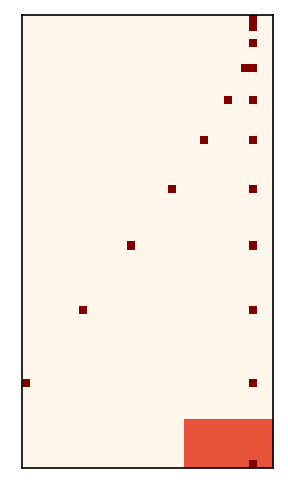

In [321]:
import numpy as np
import matplotlib.pyplot as plt

def plotPath(vx,vy,xt,yt):
    path = shootProbe(vx,vy,xt,yt)
    if path:
        x_max = xt[1]+1
        y_top = max([y for x,y in path])
        y_max = -yt[1]+y_top+1
        zone = np.zeros((y_max,x_max),dtype=int)
        for x in range(xt[0],xt[1]+1):
            for y in range(-yt[0],-yt[1]+1):
                zone[y+y_top,x] = 20
        ic = 30
        for x,y in path:
            zone[y_top-y,x] = ic
            #ic += 1
        return zone
    else:
        return None

vx0 = max(ymax0)[1][0]
vy0 = max(ymax0)[1][1]
zone0 = plotPath(vx0,vy0,xt0,yt0)

fig = plt.figure(figsize=(4,4),dpi=150)
f = plt.imshow(zone0,cmap='OrRd')
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)

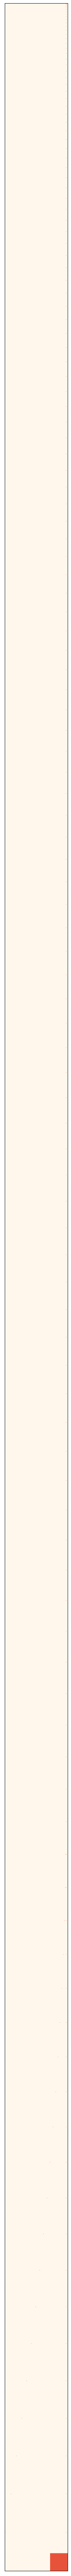

In [322]:
vx = max(ymax)[1][0]
vy = max(ymax)[1][1]

zone = plotPath(vx,vy,xt,yt)

fig = plt.figure(figsize=(10,100),dpi=150)
f = plt.imshow(zone,cmap='OrRd')
f.axes.get_xaxis().set_visible(False)
f.axes.get_yaxis().set_visible(False)